In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../data/Twitter_volume_FB.csv")
df.head(10)

,timestamp,value
0,2015-02-26 21:42:53,53
1,2015-02-26 21:47:53,64
2,2015-02-26 21:52:53,49
3,2015-02-26 21:57:53,48
4,2015-02-26 22:02:53,22
5,2015-02-26 22:07:53,23
6,2015-02-26 22:12:53,17
7,2015-02-26 22:17:53,35
8,2015-02-26 22:22:53,23
9,2015-02-26 22:27:53,39


In [3]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
df.dtypes

timestamp    datetime64[ns]
value                 int64
dtype: object

In [6]:
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df.head(10)

,timestamp,value,day,month,year
0,2015-02-26 21:42:53,53,26,2,2015
1,2015-02-26 21:47:53,64,26,2,2015
2,2015-02-26 21:52:53,49,26,2,2015
3,2015-02-26 21:57:53,48,26,2,2015
4,2015-02-26 22:02:53,22,26,2,2015
5,2015-02-26 22:07:53,23,26,2,2015
6,2015-02-26 22:12:53,17,26,2,2015
7,2015-02-26 22:17:53,35,26,2,2015
8,2015-02-26 22:22:53,23,26,2,2015
9,2015-02-26 22:27:53,39,26,2,2015


In [7]:
dt=df['timestamp']
dt = pd.DatetimeIndex ( dt ).astype ( np.int64 )/1000000
df['unixTime']=dt
df.head(10)

,timestamp,value,day,month,year,unixTime
0,2015-02-26 21:42:53,53,26,2,2015,1.424987e+12
1,2015-02-26 21:47:53,64,26,2,2015,1.424987e+12
2,2015-02-26 21:52:53,49,26,2,2015,1.424988e+12
3,2015-02-26 21:57:53,48,26,2,2015,1.424988e+12
4,2015-02-26 22:02:53,22,26,2,2015,1.424988e+12
5,2015-02-26 22:07:53,23,26,2,2015,1.424988e+12
6,2015-02-26 22:12:53,17,26,2,2015,1.424989e+12
7,2015-02-26 22:17:53,35,26,2,2015,1.424989e+12
8,2015-02-26 22:22:53,23,26,2,2015,1.424989e+12
9,2015-02-26 22:27:53,39,26,2,2015,1.424990e+12


In [8]:
arr_value = np.array(df['value']) 
arr_value

array([ 53,  64,  49, ..., 132,  78, 117], dtype=int64)

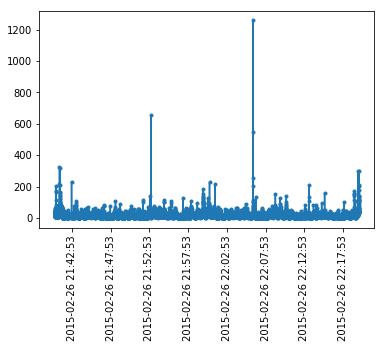

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticklabels(df['timestamp'], rotation=90)
ax.plot_date(x=df.timestamp, y=df.value, ls='-', marker='.')

In [10]:
import sklearn as sc
from sklearn.model_selection import train_test_split

labels = df['value']
features = df[['timestamp']]
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [11]:
from sklearn.ensemble import IsolationForest

model = IsolationForest()
model.fit(X_train, y_train)
#Predicting the label of the new data set
y_pred = model.predict(X_test)
print (y_pred)

C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


[ 1 -1  1 ...  1  1  1]


C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.0034733185980423114

In [13]:
labels2 = df['value']
features2 = df[['day', 'month', 'year']]
X_train, X_test, y_train, y_test = train_test_split(features2, 
                                                    labels2, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [14]:
model2 = IsolationForest(max_samples=100, random_state=14)
model2.fit(X_train, y_train)
#Predicting the label of the new data set
y_pred = model2.predict(X_test)
print (y_pred)

C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[ 1 -1  1 ...  1  1  1]


In [15]:
print(list(y_pred).count(1)/y_pred.shape[0])

0.9055888853804863


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


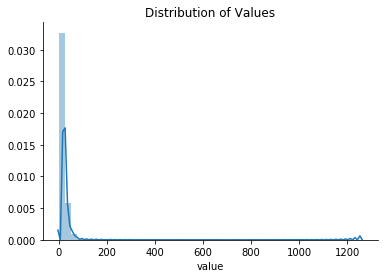

In [16]:
import seaborn as sns
sns.distplot(df['value'])
plt.title("Distribution of Values")
sns.despine()

In [17]:
print("Skewness: %f" % df['value'].skew())
print("Kurtosis: %f" % df['value'].kurt())

Skewness: 21.803447
Kurtosis: 1109.215457


In [18]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['value'].values.reshape(-1, 1))
xx = np.linspace(df['value'].min(), df['value'].max(), len(df)).reshape(-1,1)

C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


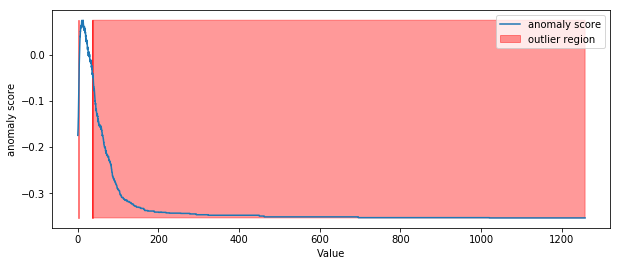

In [19]:
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Value')
plt.show();

In [20]:
labels = df['value']
features = df[['unixTime']]
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.20, 
                                                    random_state=42)

import numpy as np
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(X_test)

X_scores = clf.negative_outlier_factor_
X_scores

ground_truth = np.ones(len(X_test), dtype=int)

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X_test)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [30]:
X=np.array(df['value']).reshape(-1, 1)
from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(X)
if_scores = clf.decision_function(X)
if_anomalies=clf.predict(X)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=df[if_anomalies==1]

C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Text(0.5,1,'Histogram of Avg Anomaly Scores: Lower => More Anomalous')

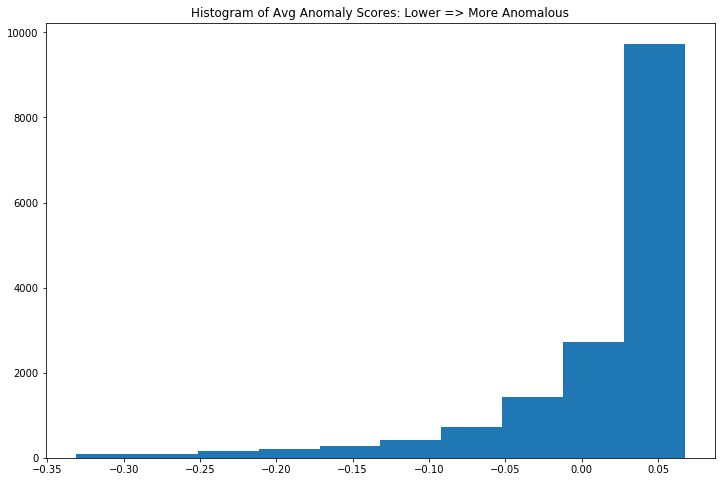

In [22]:
plt.figure(figsize=(12,8))
plt.hist(if_scores)
plt.title('Histogram of Avg Anomaly Scores: Lower => More Anomalous')

In [23]:
df.head()

,timestamp,value,day,month,year,unixTime
0,2015-02-26 21:42:53,53,26,2,2015,1.424987e+12
1,2015-02-26 21:47:53,64,26,2,2015,1.424987e+12
2,2015-02-26 21:52:53,49,26,2,2015,1.424988e+12
3,2015-02-26 21:57:53,48,26,2,2015,1.424988e+12
4,2015-02-26 22:02:53,22,26,2,2015,1.424988e+12


(1425000000000.0, 1425160000000.0)

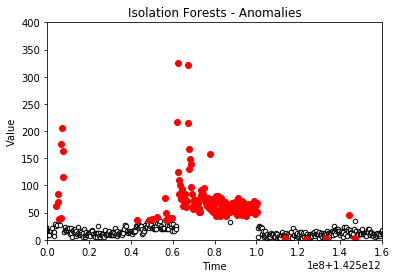

In [35]:
cmap=np.array(['white','red'])
plt.scatter(df.iloc[:,5], df.iloc[:,1],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies.iloc[:,5],if_anomalies.iloc[:,1],c='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Isolation Forests - Anomalies')
plt.ylim(0, 400)
plt.xlim(1.425e+12, 1.42516e+12)

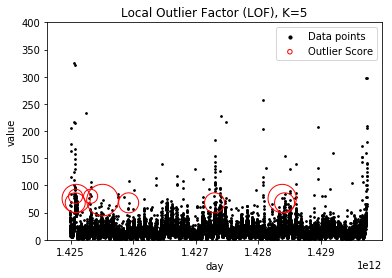

In [41]:
def LOF_plot(k):
 import seaborn as sns
 from sklearn.neighbors import LocalOutlierFactor
 var1,var2=1,2
 clf = LocalOutlierFactor(n_neighbors=k, contamination=.1)
 y_pred = clf.fit_predict(X)
 LOF_Scores = clf.negative_outlier_factor_
 
 plt.title("Local Outlier Factor (LOF), K={}".format(k))
 plt.scatter(df.iloc[:, 5], df.iloc[:, 1], color='k', s=3., label='Data points')
 radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() - LOF_Scores.min())
 plt.scatter(df.iloc[:, 5],df.iloc[:, 1], s=1000 * radius, edgecolors='r',
 facecolors='none', label='Outlier Score')
 plt.axis('tight')
 plt.ylabel("{}".format(df.columns[var1]))
 plt.xlabel("{}".format(df.columns[var2]))
 legend = plt.legend(loc='upper right')
 legend.legendHandles[0]._sizes = [10]
 legend.legendHandles[1]._sizes = [20]
 plt.ylim(0, 400)
 plt.show()
LOF_plot(5)

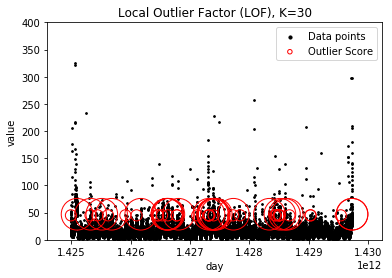

In [42]:
LOF_plot(30)

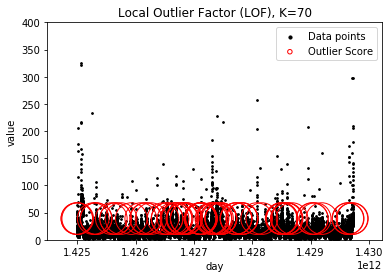

In [43]:
LOF_plot(70)

In [28]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=30, contamination=.1)
y_pred = clf.fit_predict(X)
LOF_Scores = clf.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies=df[LOF_pred==1]

(1425000000000.0, 1425160000000.0)

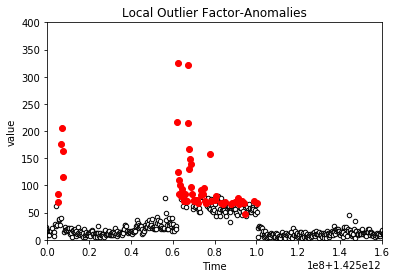

In [34]:
cmap=np.array(['white','red'])
plt.scatter(df.iloc[:,5],df.iloc[:,1],c='white',s=20,edgecolor='k')
plt.scatter(LOF_anomalies.iloc[:,5],LOF_anomalies.iloc[:,1],c='red')
 #,marker=’x’,s=100)
plt.title('Local Outlier Factor-Anomalies')
plt.xlabel('Time')
plt.ylabel('value')
plt.ylim(0, 400)
plt.xlim(1.425e+12, 1.42516e+12)


https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1
http://financeandpython.com/SeabornDataVisualization/6/2.html
https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf